## Model Selection with Cross-Validation

Kaggle (https://www.kaggle.com/datasets/uciml/iris?select=Iris.csv)

## Loading the Iris.csv dataset.

In [ ]:
# Loading the dataset using pandas library
import pandas as pd
data = pd.read_csv('Iris.csv')
data.head()  # first 5 rows of dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Shape of dataset

In [ ]:
# checking the shape of dataset
data.shape # number of rows and columns

(150, 6)

## Checking for missing values

In [ ]:
# counting the number of null values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

We can see there are no null values present in the dataset

In [ ]:
# inforamtion about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Droping unnecessary column 'ID'

In [ ]:
data = data.drop(['Id'], axis=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Target']= le.fit_transform(data['Species'])

In [ ]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Target
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [ ]:
data['Target'].value_counts()

Target
0    50
1    50
2    50
Name: count, dtype: int64

## Visualizations

In [ ]:
d0 = data[data.Target==0] #setosa
d1 = data[data.Target==1] #versicolor
d2 = data[data.Target==2] #virginica

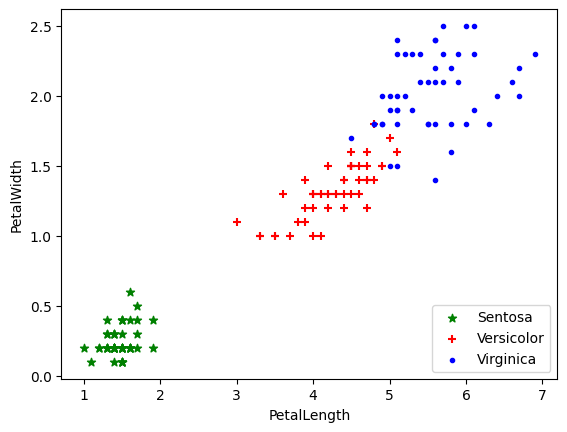

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(d0['PetalLengthCm'], d0['PetalWidthCm'], marker='*', color='green')  #green is sentosa
plt.scatter(d1['PetalLengthCm'], d1['PetalWidthCm'], marker='+', color='red')  #red is versicolor
plt.scatter(d2['PetalLengthCm'], d2['PetalWidthCm'], marker='.', color='blue')  #blue is virginica
plt.xlabel('PetalLength')
plt.ylabel('PetalWidth')
plt.legend(["Sentosa", "Versicolor", "Virginica"], loc="lower right")

## Choosing X, Y (Dependent & Independent Variable)

In [ ]:
x = data.iloc[:,:-2]
y = data.iloc[:,-1]

In [ ]:
x.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Target, Length: 150, dtype: int32

## Train - Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,  test_size=0.3) # 30 percent is test size

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(150, 4) (105, 4) (45, 4)


In [ ]:
print(y.shape, y_train.shape, y_test.shape)

(150,) (105,) (45,)


## Training & Testing models

### Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear')
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_train)

from sklearn.metrics import accuracy_score
svm_acc = accuracy_score(y_train, svm_pred)
print("Accuracy of SVM (Train): ", svm_acc)

Accuracy of SVM (Train):  1.0


In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear')
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)

from sklearn.metrics import accuracy_score
svm_acc = accuracy_score(y_test, svm_pred)
print("Accuracy of SVM (Test): ", svm_acc)

Accuracy of SVM (Test):  0.9555555555555556


In [ ]:
from sklearn import metrics
svm_cr = metrics.classification_report(y_test, svm_pred)
print(svm_cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.90      0.95        21
           2       0.85      1.00      0.92        11

    accuracy                           0.96        45
   macro avg       0.95      0.97      0.96        45
weighted avg       0.96      0.96      0.96        45



In [ ]:
metrics.confusion_matrix(y_test, svm_pred)

array([[13,  0,  0],
       [ 0, 19,  2],
       [ 0,  0, 11]], dtype=int64)

### KNearest Neighbour (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_train)

print("Accuracy of KNN (Train): ", accuracy_score(y_train, knn_pred))

Accuracy of KNN (Train):  0.9904761904761905


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)

print("Accuracy of KNN (Test): ", accuracy_score(y_test, knn_pred))

Accuracy of KNN (Test):  0.9333333333333333


In [ ]:
knn_cr = metrics.classification_report(y_test, knn_pred)
print(knn_cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.86      0.92        21
           2       0.79      1.00      0.88        11

    accuracy                           0.93        45
   macro avg       0.93      0.95      0.93        45
weighted avg       0.95      0.93      0.93        45



In [ ]:
metrics.confusion_matrix(y_test, knn_pred)

array([[13,  0,  0],
       [ 0, 18,  3],
       [ 0,  0, 11]], dtype=int64)

### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_train)

print("Accuracy of Decision Tree (Train): ", accuracy_score(y_train, dt_pred))

Accuracy of Decision Tree (Train):  1.0


In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)

print("Accuracy of Decision Tree (Train): ", accuracy_score(y_test, dt_pred))

Accuracy of Decision Tree (Train):  0.8666666666666667


In [ ]:
dt_cr = metrics.classification_report(y_test, dt_pred)
print(dt_cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.71      0.83        21
           2       0.65      1.00      0.79        11

    accuracy                           0.87        45
   macro avg       0.88      0.90      0.87        45
weighted avg       0.91      0.87      0.87        45



In [ ]:
metrics.confusion_matrix(y_test, dt_pred)

array([[13,  0,  0],
       [ 0, 15,  6],
       [ 0,  0, 11]], dtype=int64)

## Cross - Validation

### SVM

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

kfold = KFold(n_splits=5, shuffle=True)
cv_acc = cross_val_score(SVC(kernel='linear'), x, y, cv=kfold)

print("Accuracy in 5 folds: ", cv_acc)
cv_svm_acc = cv_acc.mean()
print("Average accuracy: ", cv_svm_acc)

Accuracy in 5 folds:  [0.96666667 1.         1.         1.         1.        ]
Average accuracy:  0.9933333333333334


In [ ]:
cv_precision = cross_val_score(SVC(kernel='linear'), x, y, cv=kfold, scoring='precision_macro')
print("Average precision: ", cv_precision.mean())
recall = cross_val_score(SVC(kernel='linear'), x, y, cv=kfold, scoring='recall_macro').mean()
print("Average Recall: ", recall)
f1_score = cross_val_score(SVC(kernel='linear'), x, y, cv=kfold, scoring='f1_macro').mean()
print("Average F1-Score: ", f1_score)

Average precision:  0.9800000000000001
Average Recall:  0.9814814814814815
Average F1-Score:  0.9852898690427294


### KNN

In [ ]:
kfold = KFold(n_splits=5, shuffle=True)
cv_acc = cross_val_score(KNeighborsClassifier(n_neighbors = 11), x, y, cv=kfold)

print("Accuracy in 5 folds: ", cv_acc)
cv_acc_knn = cv_acc.mean()
print("Average accuracy: ", cv_acc_knn)

Accuracy in 5 folds:  [0.96666667 0.96666667 0.96666667 1.         0.9       ]
Average accuracy:  0.96


In [ ]:
precision = cross_val_score(KNeighborsClassifier(n_neighbors = 11), x, y, cv=kfold, scoring='precision_macro').mean()
print("Average Precision: ", precision)
recall = cross_val_score(KNeighborsClassifier(n_neighbors = 11), x, y, cv=kfold, scoring='recall_macro').mean()
print("Average Recall: ", recall)
f1_score = cross_val_score(KNeighborsClassifier(n_neighbors = 11), x, y, cv=kfold, scoring='f1_macro').mean()
print("Average F1-Score: ", f1_score)

Average Precision:  0.9677024827024827
Average Recall:  0.9498653198653197
Average F1-Score:  0.9732099558358813


### Decision Tree

In [ ]:
kfold = KFold(n_splits=5, shuffle=True)
cv_acc = cross_val_score(DecisionTreeClassifier(), x, y, cv=kfold)

print("Accuracy in 5 folds: ", cv_acc)
cv_acc_dt = cv_acc.mean()
print("Average accuracy: ", cv_acc_dt)

Accuracy in 5 folds:  [0.96666667 0.96666667 0.93333333 1.         0.9       ]
Average accuracy:  0.9533333333333334


In [ ]:
precision = cross_val_score(DecisionTreeClassifier(), x, y, cv=kfold, scoring='precision_macro').mean()
print("Average Precision: ", precision)
recall = cross_val_score(DecisionTreeClassifier(), x, y, cv=kfold, scoring='recall_macro').mean()
print("Average Recall: ", recall)
f1_score = cross_val_score(DecisionTreeClassifier(), x, y, cv=kfold, scoring='f1_macro').mean()
print("Average F1-Score: ", f1_score)

Average Precision:  0.937094017094017
Average Recall:  0.9421380471380472
Average F1-Score:  0.913008641498344


## Best Model

In [ ]:
best_model = max(cv_acc_dt, cv_acc_knn, cv_svm_acc)
print(f"Best Model: {best_model}")

Best Model: 0.9933333333333334


### Here, we can conclude that Support Vector Machine has the highest accuracy and suitable for predicting this particular dataset.